In [1]:
import re
import os
import sys
import nltk
import string
import itertools
import csv
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn import preprocessing, tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import LinearSVC
from features import *
from tokenizer import tokenize

In [2]:
def read_file(filename):
    with open(filename, 'r', encoding="utf-8") as f:
        reader = csv.reader(f)
        # read the header
        header_row = next(reader)
        data_set = []
        # store the data in a list
        for row in reader:
            data_set.append(row)
        # tokenize the text
        for data in data_set:
            data[0] = tokenize(data[0])
        return data_set
    
def extract_words(data_set):
    '''construct a sorted list of all the words (no duplicates) in the data set'''
    words = []
    for data in data_set:
        words += data[0]
    return sorted(set(words))

In [3]:
""" Dataset: one-sentence"""
file_name = 'data/train.csv'

documents_words = extract_words(read_file(file_name))
documents = read_file(file_name)
y = [lst[1] for lst in documents]

In [4]:
folder = os.getcwd() + '/classifiers'
try:
    os.mkdir(folder)
except FileExistsError:
    pass

In [5]:
""" One Hot Encoder """
def ohe_encoder(X):
    """ Use One Hot Encoder deals to turn all values in a list into binary values"""
    ohe_encoder = preprocessing.OneHotEncoder(categories='auto', handle_unknown='ignore')
    ohe_encoder.fit(X)
    X = ohe_encoder.transform(X).toarray()
    return X

In [6]:
def get_X(feature):
    try:
        X = [feature(d) for (d, label) in documents]
        X = ohe_encoder(X)
    except:
        X = [feature(d, documents_words) for (d, label) in documents]
        X = ohe_encoder(X)
    return X

In [7]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], '.02f'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [8]:
folder = os.getcwd() + '/plots'
try:
    os.mkdir(folder)
except FileExistsError:
    pass

In [15]:
def run_classifier(feature, classifier, classifier_name): 
    X = get_X(feature)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    clf = classifier
    #clf = MultinomialNB()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    y_pred = clf.predict(X_test)
    #f1 = f1_score(y_test, y_pred.tolist(), pos_label="pos")
    cnf_matrix = confusion_matrix(y_test, y_pred.tolist())
    np.set_printoptions(precision=2)
#     print(cnf_matrix)
    # Plot non-normalized confusion matrix
    clf_folder = os.getcwd() + '/plots/' + classifier_name
    try:
        os.mkdir(clf_folder)
    except FileExistsError:
        pass
    class_names = ['real','fake']
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                          title='Normalized confusion matrix using '+feature.__name__)

    plt.savefig(clf_folder + '/' + feature.__name__ + '.png' )
    plt.show()
    
    target_names = ['real','fake']
    clf_report = classification_report(y_test, y_pred.tolist(), target_names=target_names)
    print(clf_report)

In [16]:
features = [raw_count, pos_tagger, senti_features2, word_length_features]

============ MultinomialNB ============
raw_count
Confusion matrix, without normalization
[[457 429]
 [337 825]]
Normalized confusion matrix
[[0.52 0.48]
 [0.29 0.71]]


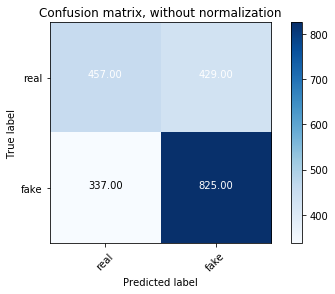

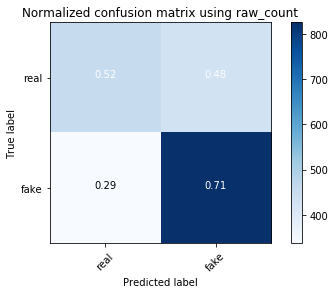

              precision    recall  f1-score   support

        real       0.58      0.52      0.54       886
        fake       0.66      0.71      0.68      1162

    accuracy                           0.63      2048
   macro avg       0.62      0.61      0.61      2048
weighted avg       0.62      0.63      0.62      2048

============ MultinomialNB ============
pos_tagger
Confusion matrix, without normalization
[[334 551]
 [348 815]]
Normalized confusion matrix
[[0.38 0.62]
 [0.3  0.7 ]]


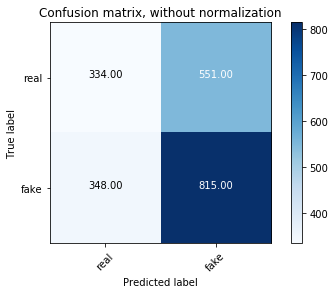

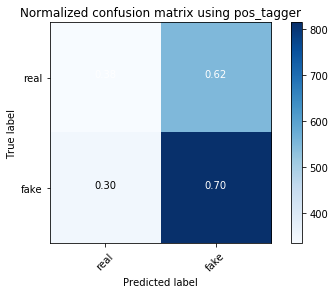

              precision    recall  f1-score   support

        real       0.49      0.38      0.43       885
        fake       0.60      0.70      0.64      1163

    accuracy                           0.56      2048
   macro avg       0.54      0.54      0.54      2048
weighted avg       0.55      0.56      0.55      2048

============ MultinomialNB ============
senti_features2
Confusion matrix, without normalization
[[188 735]
 [238 887]]
Normalized confusion matrix
[[0.2  0.8 ]
 [0.21 0.79]]


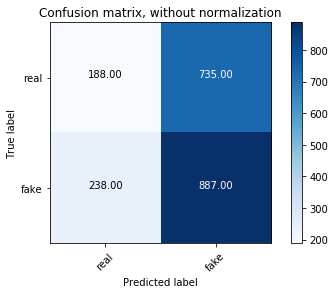

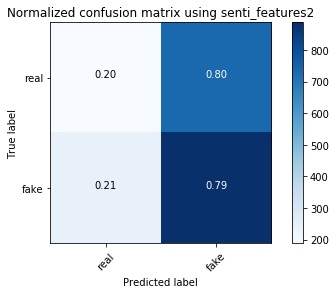

              precision    recall  f1-score   support

        real       0.44      0.20      0.28       923
        fake       0.55      0.79      0.65      1125

    accuracy                           0.52      2048
   macro avg       0.49      0.50      0.46      2048
weighted avg       0.50      0.52      0.48      2048

============ MultinomialNB ============
word_length_features
Confusion matrix, without normalization
[[317 534]
 [431 766]]
Normalized confusion matrix
[[0.37 0.63]
 [0.36 0.64]]


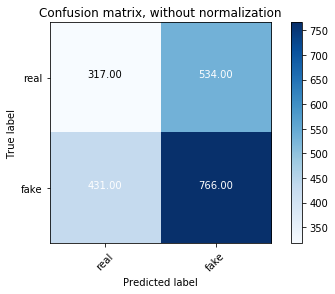

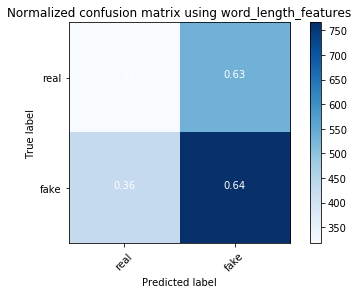

              precision    recall  f1-score   support

        real       0.42      0.37      0.40       851
        fake       0.59      0.64      0.61      1197

    accuracy                           0.53      2048
   macro avg       0.51      0.51      0.51      2048
weighted avg       0.52      0.53      0.52      2048



In [17]:
for feature in features:
    print("============ MultinomialNB ============")
    print(feature.__name__)
    run_classifier(feature, MultinomialNB(), 'Naive Bayes')

=========== LogisticRegression =============
raw_count
Confusion matrix, without normalization
[[413 449]
 [390 796]]
Normalized confusion matrix
[[0.48 0.52]
 [0.33 0.67]]


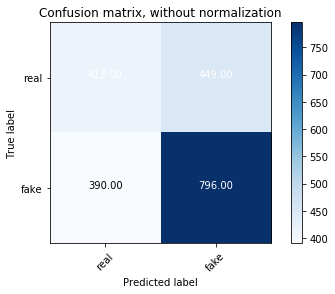

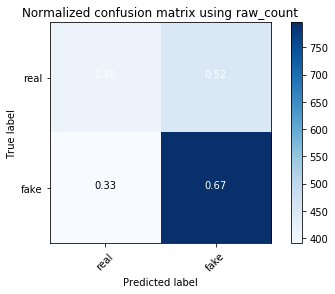

              precision    recall  f1-score   support

        real       0.51      0.48      0.50       862
        fake       0.64      0.67      0.65      1186

    accuracy                           0.59      2048
   macro avg       0.58      0.58      0.58      2048
weighted avg       0.59      0.59      0.59      2048

=========== LogisticRegression =============
pos_tagger
Confusion matrix, without normalization
[[294 620]
 [250 884]]
Normalized confusion matrix
[[0.32 0.68]
 [0.22 0.78]]


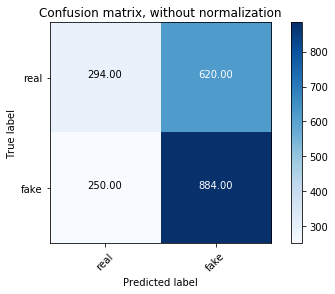

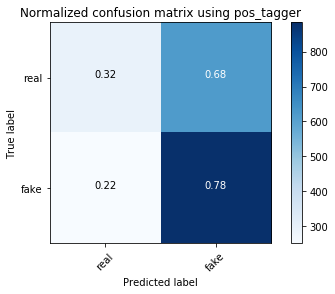

              precision    recall  f1-score   support

        real       0.54      0.32      0.40       914
        fake       0.59      0.78      0.67      1134

    accuracy                           0.58      2048
   macro avg       0.56      0.55      0.54      2048
weighted avg       0.57      0.58      0.55      2048

=========== LogisticRegression =============
senti_features2
Confusion matrix, without normalization
[[178 709]
 [219 942]]
Normalized confusion matrix
[[0.2  0.8 ]
 [0.19 0.81]]


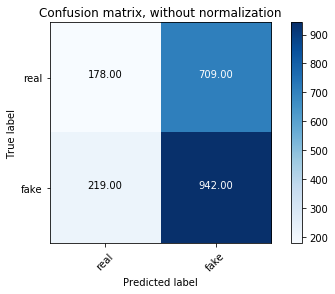

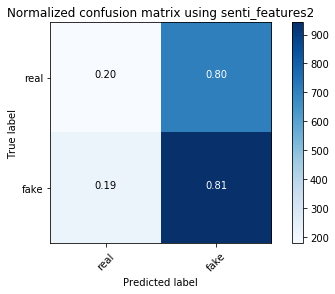

              precision    recall  f1-score   support

        real       0.45      0.20      0.28       887
        fake       0.57      0.81      0.67      1161

    accuracy                           0.55      2048
   macro avg       0.51      0.51      0.47      2048
weighted avg       0.52      0.55      0.50      2048

=========== LogisticRegression =============
word_length_features
Confusion matrix, without normalization
[[257 662]
 [301 828]]
Normalized confusion matrix
[[0.28 0.72]
 [0.27 0.73]]


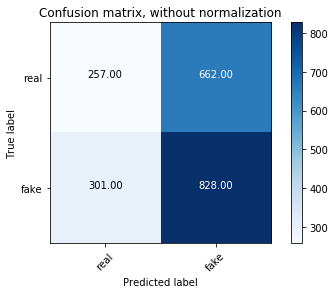

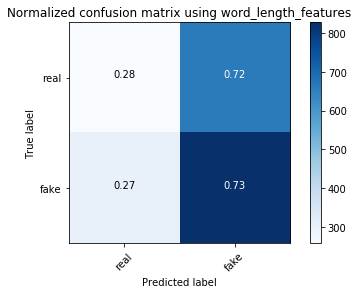

              precision    recall  f1-score   support

        real       0.46      0.28      0.35       919
        fake       0.56      0.73      0.63      1129

    accuracy                           0.53      2048
   macro avg       0.51      0.51      0.49      2048
weighted avg       0.51      0.53      0.50      2048



In [18]:
for feature in features:
    print("=========== LogisticRegression =============")
    print(feature.__name__)
    run_classifier(feature, LogisticRegression(), 'Logistic Regression')

=========== RandomForestClassifier =============
raw_count
Confusion matrix, without normalization
[[394 524]
 [256 874]]
Normalized confusion matrix
[[0.43 0.57]
 [0.23 0.77]]


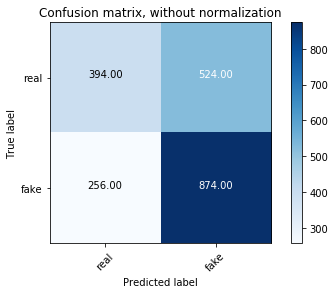

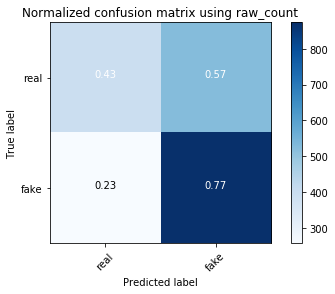

              precision    recall  f1-score   support

        real       0.61      0.43      0.50       918
        fake       0.63      0.77      0.69      1130

    accuracy                           0.62      2048
   macro avg       0.62      0.60      0.60      2048
weighted avg       0.62      0.62      0.61      2048

=========== RandomForestClassifier =============
pos_tagger
Confusion matrix, without normalization
[[359 533]
 [389 767]]
Normalized confusion matrix
[[0.4  0.6 ]
 [0.34 0.66]]


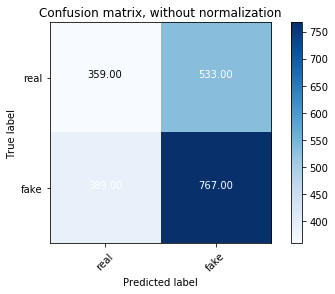

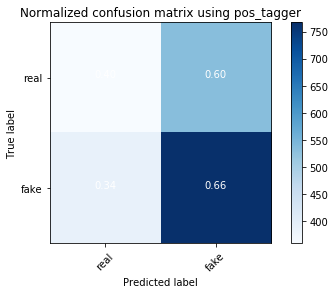

              precision    recall  f1-score   support

        real       0.48      0.40      0.44       892
        fake       0.59      0.66      0.62      1156

    accuracy                           0.55      2048
   macro avg       0.53      0.53      0.53      2048
weighted avg       0.54      0.55      0.54      2048

=========== RandomForestClassifier =============
senti_features2
Confusion matrix, without normalization
[[203 680]
 [270 895]]
Normalized confusion matrix
[[0.23 0.77]
 [0.23 0.77]]


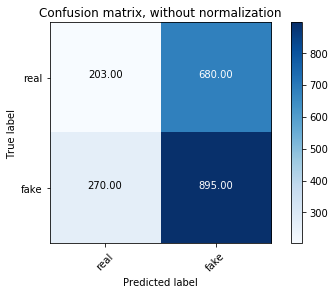

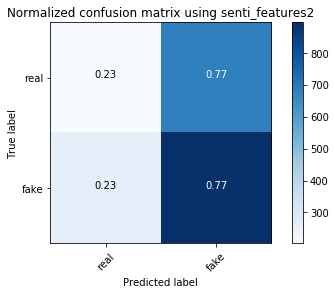

              precision    recall  f1-score   support

        real       0.43      0.23      0.30       883
        fake       0.57      0.77      0.65      1165

    accuracy                           0.54      2048
   macro avg       0.50      0.50      0.48      2048
weighted avg       0.51      0.54      0.50      2048

=========== RandomForestClassifier =============
word_length_features
Confusion matrix, without normalization
[[271 609]
 [323 845]]
Normalized confusion matrix
[[0.31 0.69]
 [0.28 0.72]]


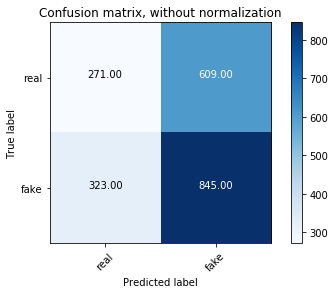

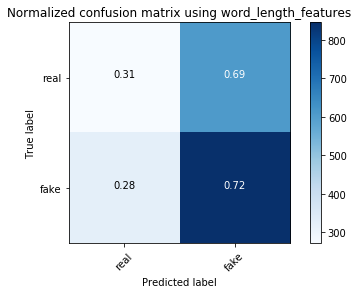

              precision    recall  f1-score   support

        real       0.46      0.31      0.37       880
        fake       0.58      0.72      0.64      1168

    accuracy                           0.54      2048
   macro avg       0.52      0.52      0.51      2048
weighted avg       0.53      0.54      0.53      2048



In [19]:
for feature in features:
    print("=========== RandomForestClassifier =============")
    print(feature.__name__)
    run_classifier(feature, RandomForestClassifier(), 'Random Forest')

============ DecisionTreeClassifier ============
raw_count
Confusion matrix, without normalization
[[439 438]
 [465 706]]
Normalized confusion matrix
[[0.5 0.5]
 [0.4 0.6]]


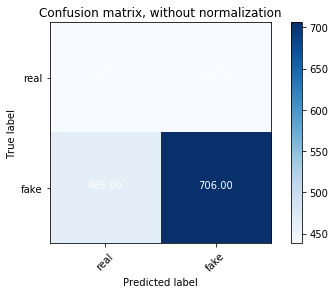

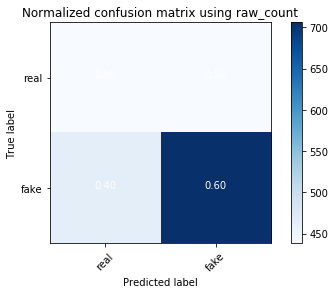

              precision    recall  f1-score   support

        real       0.49      0.50      0.49       877
        fake       0.62      0.60      0.61      1171

    accuracy                           0.56      2048
   macro avg       0.55      0.55      0.55      2048
weighted avg       0.56      0.56      0.56      2048

============ DecisionTreeClassifier ============
pos_tagger
Confusion matrix, without normalization
[[453 466]
 [573 556]]
Normalized confusion matrix
[[0.49 0.51]
 [0.51 0.49]]


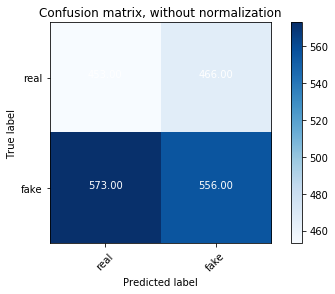

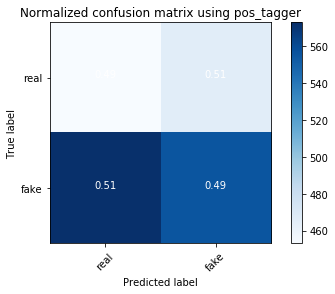

              precision    recall  f1-score   support

        real       0.44      0.49      0.47       919
        fake       0.54      0.49      0.52      1129

    accuracy                           0.49      2048
   macro avg       0.49      0.49      0.49      2048
weighted avg       0.50      0.49      0.49      2048

============ DecisionTreeClassifier ============
senti_features2
Confusion matrix, without normalization
[[259 662]
 [335 792]]
Normalized confusion matrix
[[0.28 0.72]
 [0.3  0.7 ]]


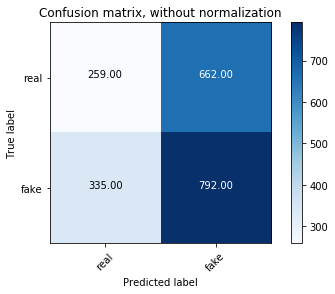

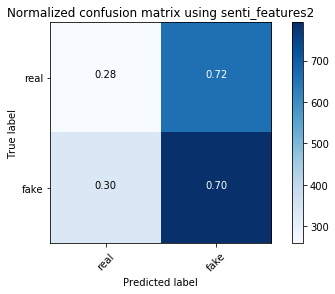

              precision    recall  f1-score   support

        real       0.44      0.28      0.34       921
        fake       0.54      0.70      0.61      1127

    accuracy                           0.51      2048
   macro avg       0.49      0.49      0.48      2048
weighted avg       0.50      0.51      0.49      2048

============ DecisionTreeClassifier ============
word_length_features
Confusion matrix, without normalization
[[409 487]
 [489 663]]
Normalized confusion matrix
[[0.46 0.54]
 [0.42 0.58]]


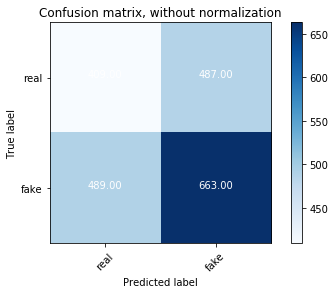

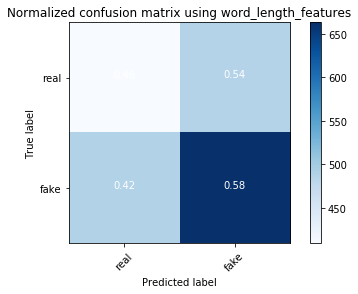

              precision    recall  f1-score   support

        real       0.46      0.46      0.46       896
        fake       0.58      0.58      0.58      1152

    accuracy                           0.52      2048
   macro avg       0.52      0.52      0.52      2048
weighted avg       0.52      0.52      0.52      2048



In [20]:
for feature in features:
    print("============ DecisionTreeClassifier ============")
    print(feature.__name__)
    run_classifier(feature, tree.DecisionTreeClassifier(),'Decision Tree')

=========== LinearSVC =============
raw_count
Confusion matrix, without normalization
[[  51  841]
 [  25 1131]]
Normalized confusion matrix
[[0.06 0.94]
 [0.02 0.98]]


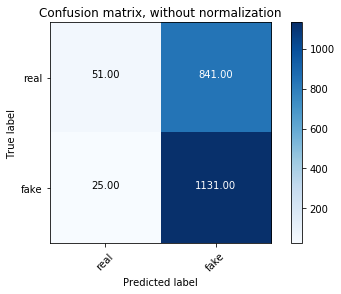

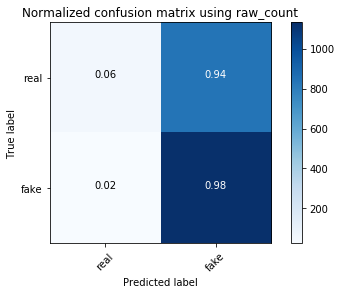

              precision    recall  f1-score   support

        real       0.67      0.06      0.11       892
        fake       0.57      0.98      0.72      1156

    accuracy                           0.58      2048
   macro avg       0.62      0.52      0.41      2048
weighted avg       0.62      0.58      0.45      2048

=========== LinearSVC =============
pos_tagger
Confusion matrix, without normalization
[[293 584]
 [274 897]]
Normalized confusion matrix
[[0.33 0.67]
 [0.23 0.77]]


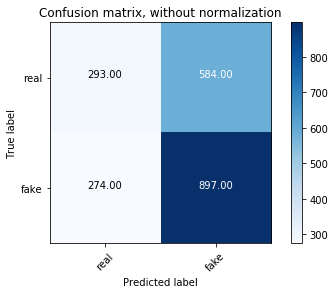

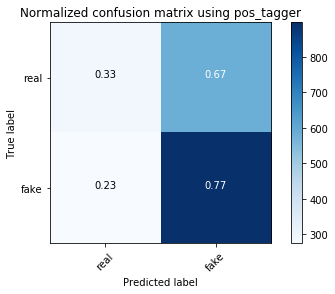

              precision    recall  f1-score   support

        real       0.52      0.33      0.41       877
        fake       0.61      0.77      0.68      1171

    accuracy                           0.58      2048
   macro avg       0.56      0.55      0.54      2048
weighted avg       0.57      0.58      0.56      2048

=========== LinearSVC =============
senti_features2
Confusion matrix, without normalization
[[229 676]
 [268 875]]
Normalized confusion matrix
[[0.25 0.75]
 [0.23 0.77]]


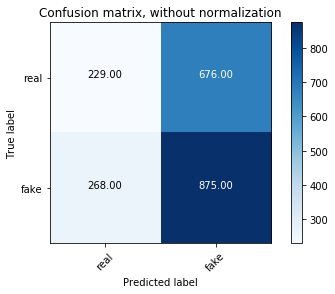

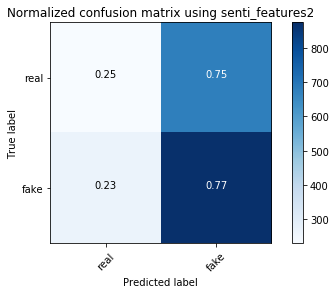

              precision    recall  f1-score   support

        real       0.46      0.25      0.33       905
        fake       0.56      0.77      0.65      1143

    accuracy                           0.54      2048
   macro avg       0.51      0.51      0.49      2048
weighted avg       0.52      0.54      0.51      2048

=========== LinearSVC =============
word_length_features
Confusion matrix, without normalization
[[287 594]
 [359 808]]
Normalized confusion matrix
[[0.33 0.67]
 [0.31 0.69]]


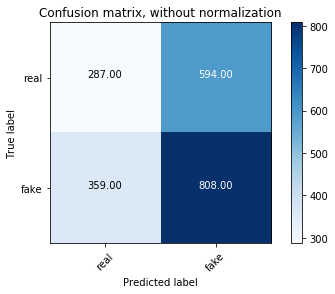

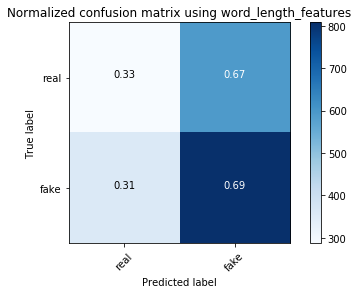

              precision    recall  f1-score   support

        real       0.44      0.33      0.38       881
        fake       0.58      0.69      0.63      1167

    accuracy                           0.53      2048
   macro avg       0.51      0.51      0.50      2048
weighted avg       0.52      0.53      0.52      2048



In [21]:
for feature in features:
    print("=========== LinearSVC =============")
    print(feature.__name__)
    run_classifier(feature, LinearSVC(), 'Linear SVM')